# AIRDOS Clibration

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt

In [8]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [83]:
fto = './data/DATALOG.TXT' #  File to Open
l=[]
l.extend(range(0,520))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

## Energy spectrum preview

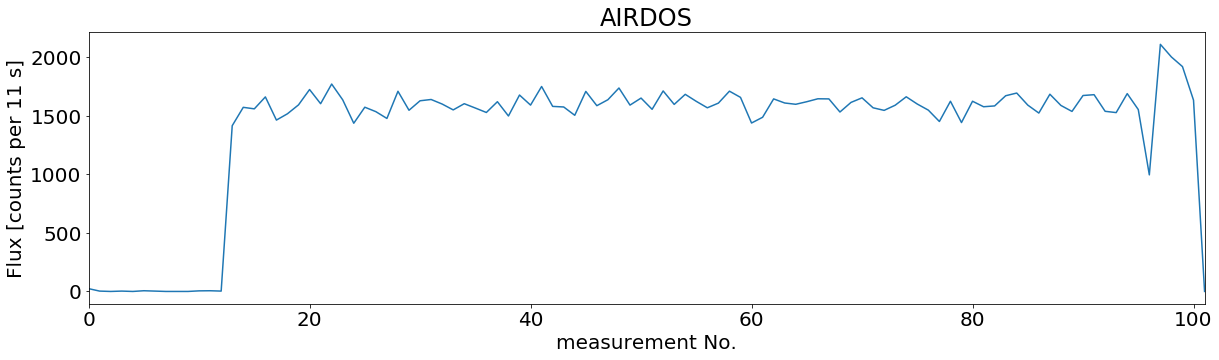

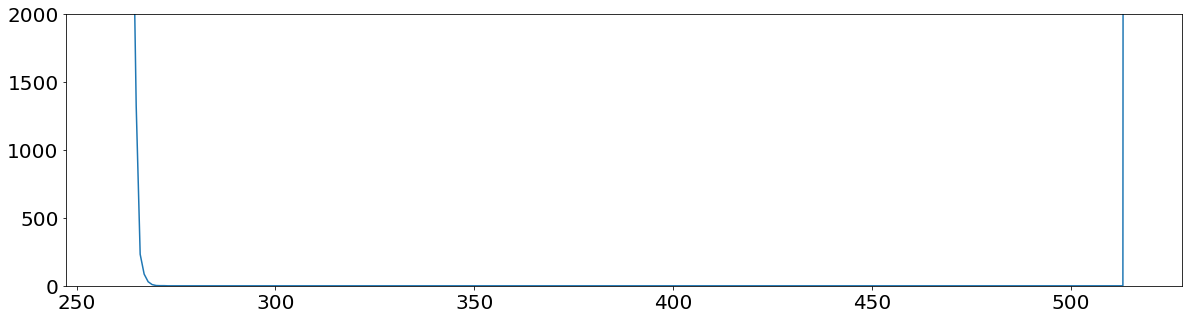

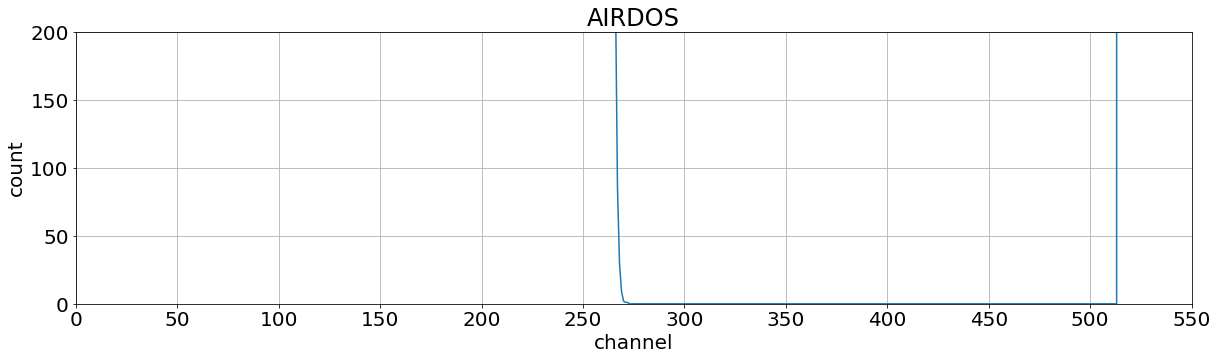

In [12]:
xfrom = 0
xto = np.nan

matplotlib.rcParams.update({'font.size': 20})

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

rc['sum'] = rc[range(260,516)].sum(axis=1)

#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[xfrom:xto,'sum'].plot()
#plt.ylim([0,30])

plt.title('AIRDOS')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

ener1 = rc.ix[xfrom:xto,260:516].sum()
 
plt.figure(figsize=(20,5))
plt.ylim([0,2000])
#plt.yscale('log')
plt.plot(ener1)

plt.figure(figsize=(20,5))
plt.plot(ener1)
plt.ylim([0,200])
#plt.legend()
plt.title('AIRDOS')
plt.xlabel('channel')
plt.ylabel('count')
plt.xticks(range(0,600,50))
plt.grid()


# Spectrum Interactive

In [7]:
%matplotlib qt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt

fto = './data/DATALOG.TXT' #  File to Open
#fto = './data/DATALOG_FRA_TRN.TXT' #  File to Open
l=[]
l.extend(range(0,520))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*')

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)


matplotlib.rcParams.update({'font.size': 20})

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(260,516)].sum(axis=1)
rc['sum'] = rc[range(260,516)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[:,'sum'].plot()

plt.title('AIRDOS')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')


points=plt.ginput(2)

plt.figure(figsize=(20,5))
rc.ix[points[0][0]:points[1][0],'sum'].plot()
points=plt.ginput(2)

#ener = rc.ix[points[0][0]:points[1][0],260:516].sum()
ener = rc.ix[points[0][0]:points[1][0],260:514].sum()

plt.figure(figsize=(20,5))

plt.plot(ener)



In [31]:
df.loc[df[0]=='$CANDY']

,,0,1,2,3,4,5,6,7,8,9,...,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029


## Calculate Flux

100


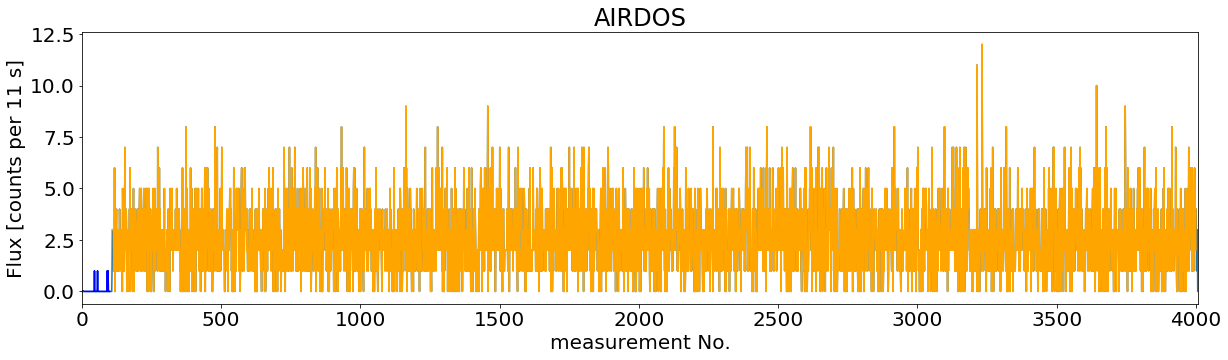

In [90]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(256,516)].sum(axis=1)
rc['sum'] = rc[range(270,513)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[0:,'sum'].plot()

#plt.ylim([0,20])

#e1 = [211,275]
#e2 = [290,355]
#e3 = [378,448]
#e4 = [483,537]
#e1 = [10,200]
#e2 = [1500,2270]
e1 = [1,100]
e2 = [110,4000]
e3 = [1,2]
e4 = [1,2]
e5 = [1,2]

rc.ix[e1[0]:e1[1],'sum'].plot(c='b')
rc.ix[e2[0]:e2[1],'sum'].plot(c='orange')
rc.ix[e3[0]:e3[1],'sum'].plot(c='g')
rc.ix[e4[0]:e4[1],'sum'].plot(c='r')
rc.ix[e5[0]:e5[1],'sum'].plot(c='purple')

plt.title('AIRDOS')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

print e1[1]

## Energy spectrum

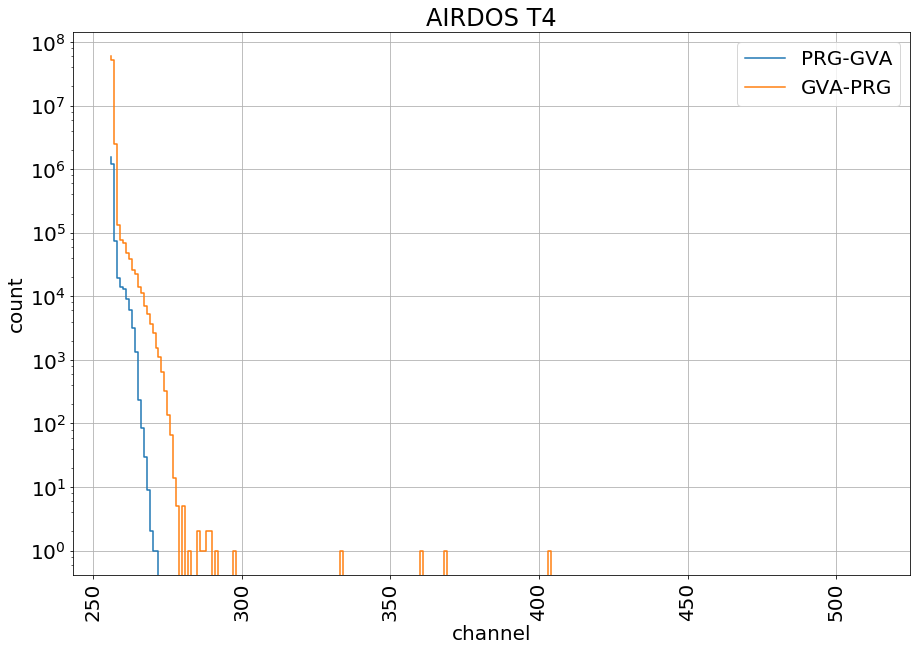

In [91]:
matplotlib.rcParams.update({'font.size': 20})

'''
plt.figure(figsize=(20,5))
rc['sum'][91:154].plot(c='blue')
rc['sum'][155:235].plot(c='red')
rc['sum'][236:296].plot(c='green')
rc['sum'][300:350].plot(c='yellow')
'''

LOW_ENERGY = 256

ener1 = rc.ix[e1[0]:e1[1],LOW_ENERGY:513].sum()
ener2 = rc.ix[e2[0]:e2[1],LOW_ENERGY:513].sum()
ener3 = rc.ix[e3[0]:e3[1],LOW_ENERGY:513].sum()
ener4 = rc.ix[e4[0]:e4[1],LOW_ENERGY:513].sum()
ener5 = rc.ix[e5[0]:e5[1],LOW_ENERGY:513].sum()
 
plt.figure(figsize=(15,10))
plt.yscale('log')


plt.plot(ener1, label='PRG-GVA', drawstyle='steps-pre')
plt.plot(ener2, label='GVA-PRG', drawstyle='steps-pre')
#plt.plot(ener1, label='Am-241 5.49 MeV (85 %) / 5.44 MeV (13 %)', drawstyle='steps-pre')
#plt.plot(ener2, label='Pu-239 5.16 MeV (73 %) / 5.14 (15 %) / 5.11 (12 %)', drawstyle='steps-pre')
#plt.plot(ener3, label='Cf-252 6.12 MeV (84 %) / 6.08 MeV (16 %)', drawstyle='steps-pre')
#plt.plot(ener1,  drawstyle='steps-pre')
#plt.plot(ener2,  drawstyle='steps-pre')
#plt.plot(ener3,  drawstyle='steps-pre')
#plt.plot(ener4, label='Am-241 5.49 MeV colim.',  drawstyle='steps-pre')
#plt.plot(ener5, label='Am-241 5.49 MeV colim.',  drawstyle='steps-pre')
#plt.ylim([0,20000])
#plt.xlim([600,750])
plt.legend()
plt.title('AIRDOS T4')
#plt.title('AIRDOS T4 Alpha Spectrum')
plt.xlabel('channel')
plt.ylabel('count')
#plt.xticks(range(500,1030,10))
plt.xticks(rotation=90)
plt.grid()


## Plot Flux

In [27]:

date = np.nan #pd.to_datetime('210317000000.00', format='%d%m%y%H%M%S.%f')
altitude = np.nan
LatDD = np.nan
LonDD = np.nan
for i,r in df.iterrows():
    if (r[0] == '$GPRMC'):
        date = pd.to_datetime(str(r[9])+str(r[1]), format='%d%m%y%H%M%S.%f',errors='coerce')
    '''
        Lat = float(r[3])
        Lon = float(r[5])

        if (r[4] == 'N'):
            Lats = 1
        else:
            Lats = -1

        if (r[6] == 'E'):
            Lons = 1
        else:
            Lons = -1

        LatDD = int(Lat/100)
        LatDD = LatDD + (Lat - 100.0*LatDD)/60.0
        LatDD = LatDD * Lats  

        LonDD = int(Lon/100)
        LonDD = LonDD + (Lon - 100.0*LonDD)/60.0
        LonDD = LonDD * Lons  
    '''       
        
    if (r[0] == '$GPGGA'):
        altitude = r[9]
    #r[20] = date
    #df.set_value(i,20,date)
    #df.set_value(i,21,altitude)
    df.set_value(i,'date',date)
    df.set_value(i,'altitude',altitude)
    #df.set_value(i,22,LatDD)
    #df.set_value(i,23,LonDD)

    if (r[0] == '$CANDY'):
        date = date + pd.Timedelta(seconds=11)
        df.set_value(i,'date',date)
        

    
#df.to_csv('complete.csv')

In [28]:
#dfo = df[[25,26,27]].reset_index().groupby(20).sum()
#df.reset_index(inplace=True)
dfo = df
#dfo.reset_index(inplace=True)
dfo.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)

#dfo = dfo[range(20,544)].groupby(20).sum()
#dfo

#df.iloc[20:40,0:30]
#dfo['sum'] = dfo[range(27,544)].sum(axis=1)

dfo.to_csv('radiation.csv')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()


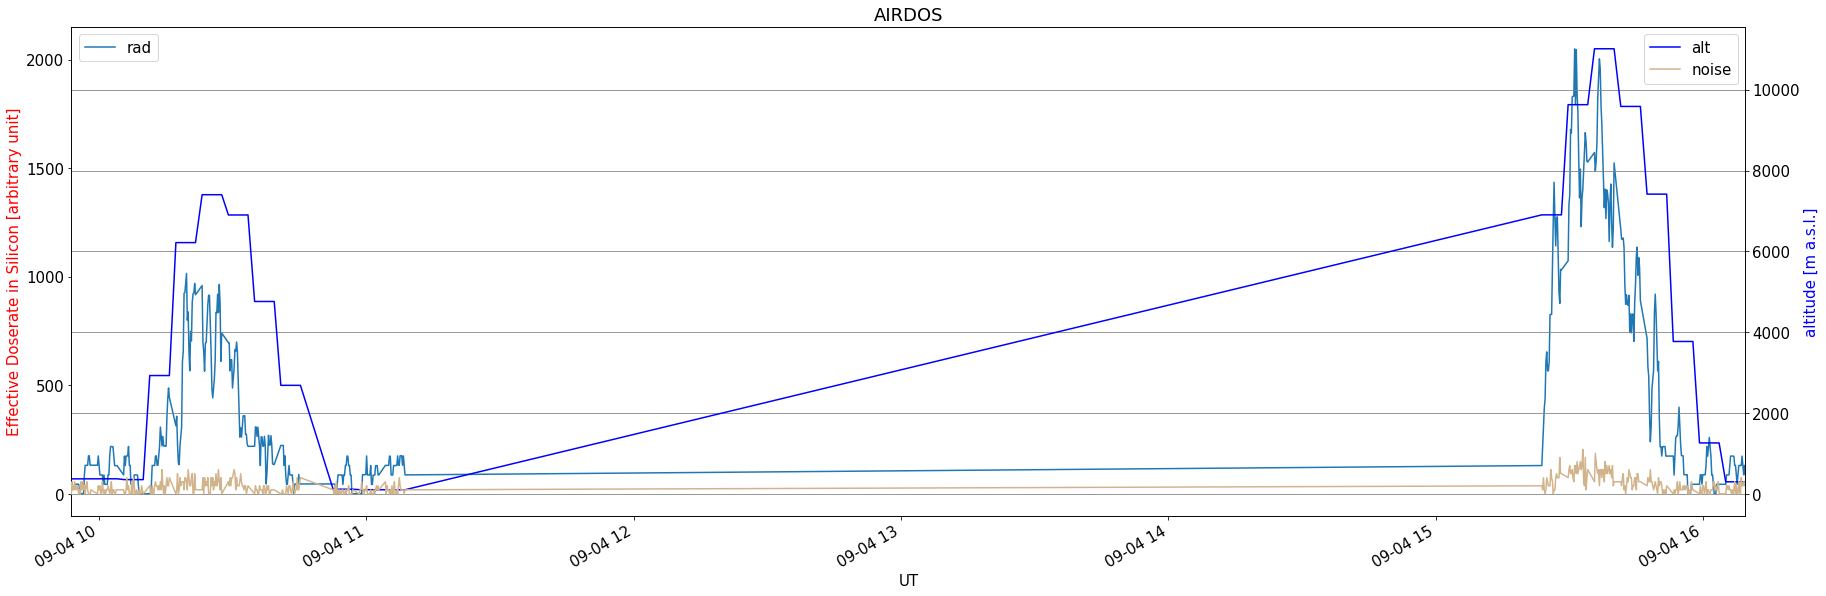

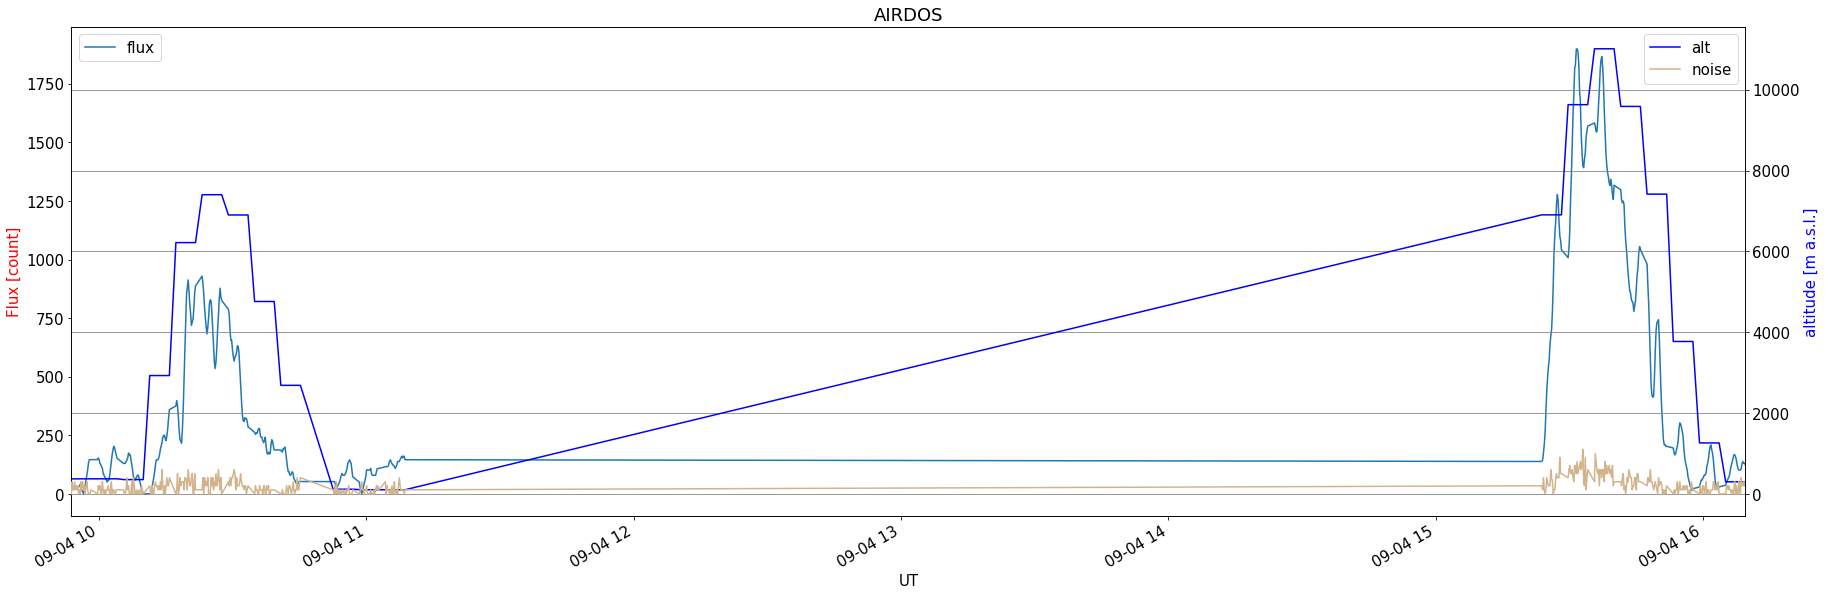

In [58]:
plt.figure(figsize=(30,10))
matplotlib.rcParams.update({'font.size': 15})

dfo = pd.read_table('radiation.csv', sep=',', header=0)
dfo = dfo.dropna(how='any')
dfo['date'] = pd.to_datetime(dfo['date'])
dfo = dfo.set_index(['date'])
NOISE_LEVEL=260
LAST_CHANNEL=516
dfo['flux'] = dfo[range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)
dfo[range(NOISE_LEVEL,LAST_CHANNEL)] = dfo[range(NOISE_LEVEL,LAST_CHANNEL)].mul(range(1,LAST_CHANNEL+1-NOISE_LEVEL),axis=1)
dfo['rad'] = dfo[range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)
#xx = dfo.loc['2017-05-31 09:00:00':'2017-06-01 01:00:00']
xx = dfo
#xx = dfo
#pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)

WINDOW = 6
xx['rad'] = pd.rolling_mean(xx['rad'],WINDOW)
xx['flux'] = pd.rolling_mean(xx['rad'],WINDOW)

#xx['rad'].plot(c='r', label='Doserate (rolling mean '+str(WINDOW)+')')
xx['rad'].plot()

plt.xlabel('UT')
plt.ylabel('Effective Doserate in Silicon [arbitrary unit]', color='red')
#, xticks=['2017-03-27 00:00','2017-03-27 12:00','2017-03-28 00:00','2017-03-28 12:00','2017-03-29 00:00'],figsize=(20,5))
plt.legend(loc=2)

ax = plt.twinx()
xx['altitude'].plot(c='b',label='alt')
plt.plot(xx['259']*100,c='tan',label='noise',zorder=10)
#plt.plot(xx[19]*5000-xx['18']*100,c='green',label='corr')
plt.ylabel('altitude [m a.s.l.]', color='blue')
#plt.ylim([0,500])
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()
plt.title('AIRDOS')

plt.figure(figsize=(30,10))
matplotlib.rcParams.update({'font.size': 15})

xx['flux'].plot()

plt.xlabel('UT')
plt.ylabel('Flux [count]', color='red')
#, xticks=['2017-03-27 00:00','2017-03-27 12:00','2017-03-28 00:00','2017-03-28 12:00','2017-03-29 00:00'],figsize=(20,5))
plt.legend(loc=2)

ax = plt.twinx()
xx['altitude'].plot(c='b',label='alt')
plt.plot(xx['259']*100,c='tan',label='noise',zorder=10)
#plt.plot(xx[19]*5000-xx['18']*100,c='green',label='corr')
plt.ylabel('altitude [m a.s.l.]', color='blue')
#plt.ylim([0,500])
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()
plt.title('AIRDOS')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()


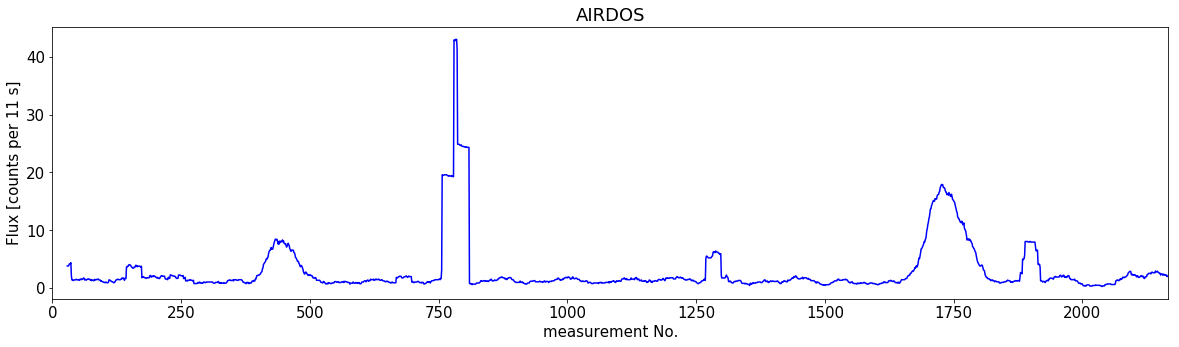

In [39]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
#rc['sum'] = rc[range(21,544)].sum(axis=1)
#rc['sum']


plt.figure(figsize=(20,5))
#plt.ylim([0,200])
NOISE_LEVEL=21
xx = rc.ix[:]
NOISE_LEVEL=260
LAST_CHANNEL=516
#xx[range(NOISE_LEVEL,LAST_CHANNEL)] = xx[range(NOISE_LEVEL,LAST_CHANNEL)].mul(range(1,LAST_CHANNEL+1-NOISE_LEVEL),axis=1)
xx['rad'] = xx[range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)

WINDOW = 30
xx['rad'] = pd.rolling_mean(xx['rad'],WINDOW)
xx['rad'].plot(c='b')

plt.title('AIRDOS')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

In [40]:
rc.iloc[:,508:]


,508,509,510,511,512,513,514,515,516,517,518,519,sum
0,0.0,0.0,0.0,0.0,0.0,0.0,26213.0,25428.0,785.0,1161.0,38161.0,65535.0,403.0
1,0.0,0.0,0.0,0.0,0.0,0.0,27388.0,27383.0,5.0,0.0,38147.0,65535.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,27445.0,27429.0,16.0,0.0,38090.0,65535.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,27414.0,27410.0,4.0,0.0,38121.0,65535.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,27406.0,27393.0,13.0,0.0,38129.0,65535.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,27361.0,27356.0,5.0,0.0,38174.0,65535.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,27437.0,27427.0,10.0,0.0,38098.0,65535.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,27440.0,27431.0,9.0,0.0,38095.0,65535.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,27412.0,27404.0,8.0,0.0,38123.0,65535.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,27451.0,27433.0,18.0,0.0,38084.0,65535.0,0.0


In [71]:
ener1[256,'x']=10
ener1

256       10.0
257       10.0
258    75501.0
259    19240.0
260    14231.0
261    12940.0
262     8933.0
263     6173.0
264     3197.0
265     1324.0
266      232.0
267       86.0
268       30.0
269        9.0
270        2.0
271        1.0
272        1.0
273        0.0
274        0.0
275        0.0
276        0.0
277        0.0
278        0.0
279        0.0
280        0.0
281        0.0
282        0.0
283        0.0
284        0.0
285        0.0
        ...   
484        0.0
485        0.0
486        0.0
487        0.0
488        0.0
489        0.0
490        0.0
491        0.0
492        0.0
493        0.0
494        0.0
495        0.0
496        0.0
497        0.0
498        0.0
499        0.0
500        0.0
501        0.0
502        0.0
503        0.0
504        0.0
505        0.0
506        0.0
507        0.0
508        0.0
509        0.0
510        0.0
511        0.0
512        0.0
x         10.0
dtype: float64

In [20]:
#df.iloc[1:2,516:1026]
ener1.to_csv('prg_gva.csv')
#ener2.to_csv('Pu.csv')
#ener3.to_csv('Cf.csv')

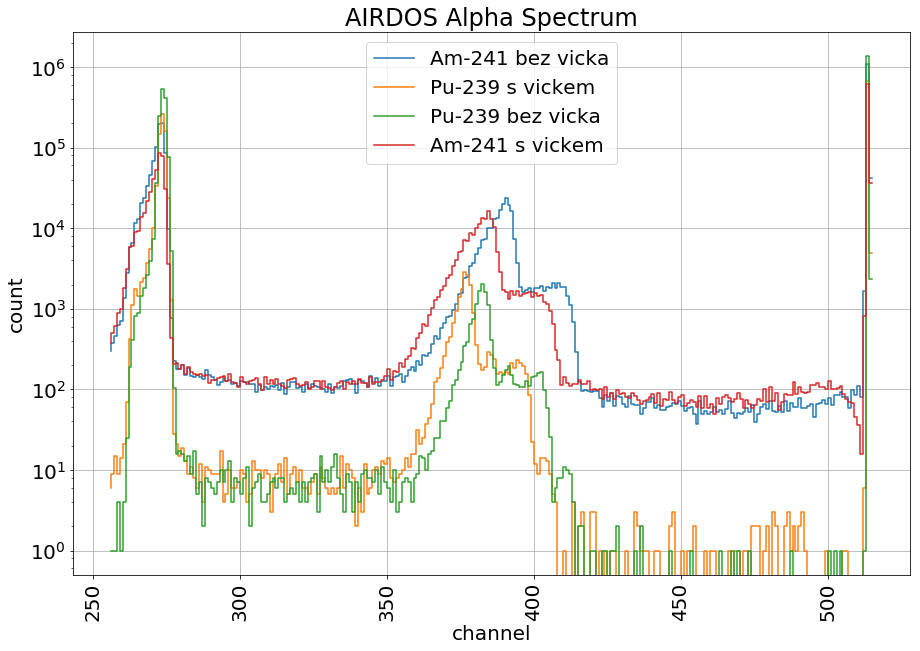

In [84]:
matplotlib.rcParams.update({'font.size': 20})

LOW_ENERGY = 256

ener1 = rc.ix[e1[0]:e1[1],LOW_ENERGY:516].sum()
ener2 = rc.ix[e2[0]:e2[1],LOW_ENERGY:516].sum()
ener3 = rc.ix[e3[0]:e3[1],LOW_ENERGY:516].sum()
ener4 = rc.ix[e4[0]:e4[1],LOW_ENERGY:516].sum()
 
plt.figure(figsize=(15,10))
plt.yscale('log')

plt.plot(ener1, label='Am-241 bez vicka', drawstyle='steps-pre')
plt.plot(ener2, label='Pu-239 s vickem', drawstyle='steps-pre')
plt.plot(ener3, label='Pu-239 bez vicka', drawstyle='steps-pre')
plt.plot(ener4, label='Am-241 s vickem',  drawstyle='steps-pre')
#plt.ylim([0,5000])
#plt.xlim([600,750])
plt.legend()
plt.title('AIRDOS Alpha Spectrum')
plt.xlabel('channel')
plt.ylabel('count')
#plt.xticks(range(500,1030,10))
plt.xticks(rotation=90)
plt.grid()


([<matplotlib.axis.XTick at 0x7f046826b0d0>,
 <a list of 13 Text xticklabel objects>)

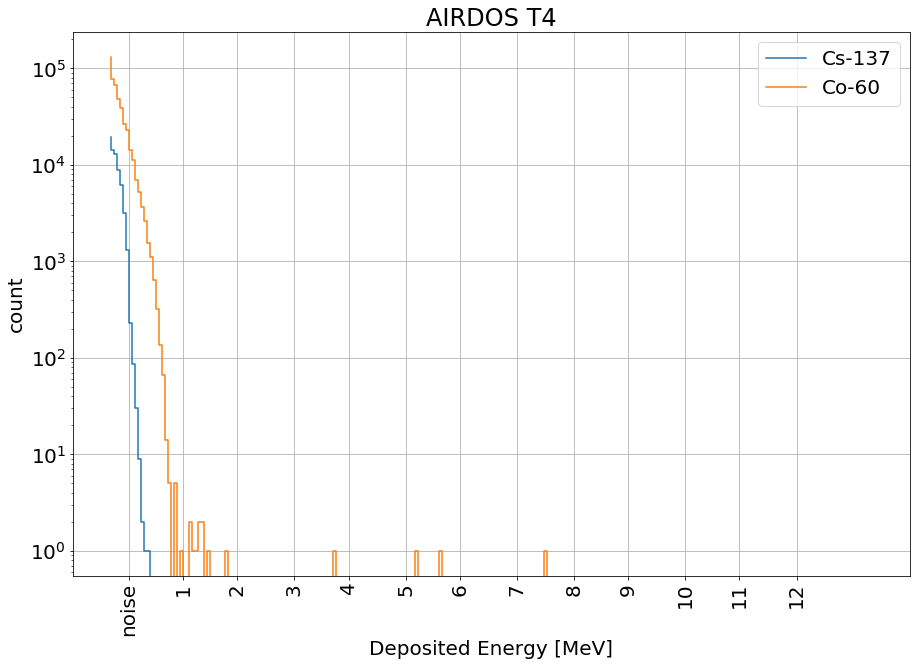

In [105]:
matplotlib.rcParams.update({'font.size': 20})

LOW_ENERGY = 259

ener1 = rc.ix[e1[0]:e1[1],LOW_ENERGY:513].sum()
ener2 = rc.ix[e2[0]:e2[1],LOW_ENERGY:513].sum()
ener3 = rc.ix[e3[0]:e3[1],LOW_ENERGY:513].sum()
ener4 = rc.ix[e4[0]:e4[1],LOW_ENERGY:513].sum()
ener5 = rc.ix[e5[0]:e5[1],LOW_ENERGY:513].sum()
 
plt.figure(figsize=(15,10))
plt.yscale('log')

plt.plot(ener1, label='Cs-137', drawstyle='steps-pre')
plt.plot(ener2, label='Co-60', drawstyle='steps-pre')
#plt.ylim([0,100000])
#plt.xlim([600,750])
plt.legend()
plt.title('AIRDOS T4')
#plt.title('AIRDOS T4 Alpha Spectrum')
plt.xlabel('Deposited Energy [MeV]')
plt.ylabel('count')
#plt.xticks(range(500,1030,10))
plt.xticks(rotation=90)
plt.grid()
plt.xticks([LOW_ENERGY+6, 283, 301, 320, 338,357,375,394,413,431,450,468,487], ['noise','1','2','3','4','5','6','7','8','9','10','11','12'])

